# Week 3 Lab Exercise: Introduction to Regression Models

## Objective
The goal of this lab is to give you hands-on experience with several different regression models and to help you understand how to evaluate their performance. You will use a simulated dataset to build and compare three different models: Linear Regression, Decision Tree Regression, and K-Nearest Neighbors (KNN) Regression.

## The Dataset
We'll use a simulated dataset to predict a continuous value. In a real-world scenario, this could be anything from predicting house prices to forecasting sales.
1. Open the Python Environment: Open the Python lab environment.
2. Generate the Data: Copy and paste the following code into your environment and run it. This will create our dataset with two variables: X (our feature) and y (our target).

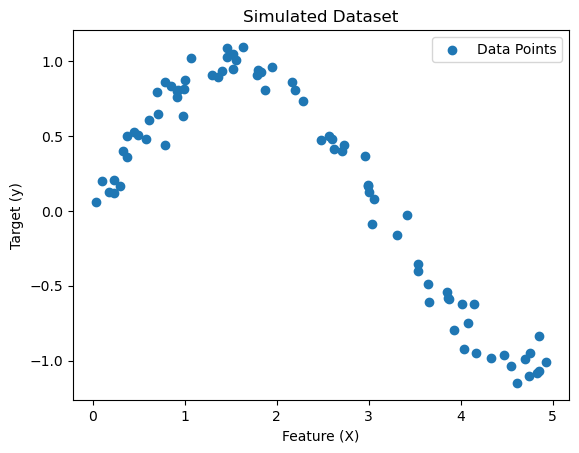

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a sample dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X, y, label='Data Points')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Simulated Dataset')
plt.legend()
plt.show()

## Linear Regression
1.  **Train the Model:** Create a LinearRegression model instance and train it using X_train and y_train.
2. **Make Predictions:** Use the trained model to make predictions on X_test.
3. **Evaluate Performance:** Calculate the **Mean Squared Error (MSE)** and **R-squared (R2)** for your model's predictions on the testing data.


Model Evaluation:
Mean Squared Error (MSE): 0.25
R-squared (R²): 0.45


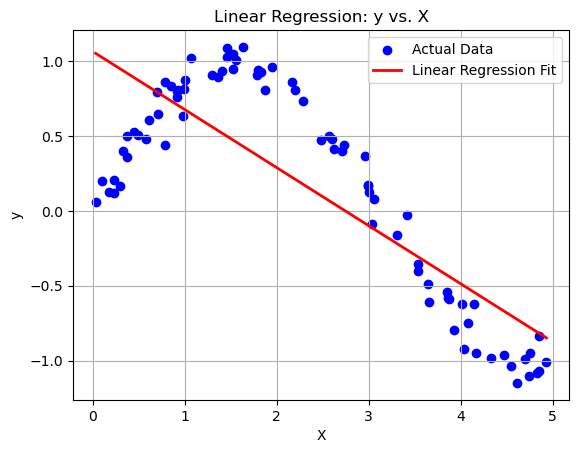

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualize the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Fit')
plt.title('Linear Regression: y vs. X')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Regression
1. **Train the Model:** Create a DecisionTreeRegressor instance and train it using X_train and y_train.
2. **Make Predictions:** Use the trained model to predict values for X_test.
3. **Evaluate Performance:** Calculate the MSE and R2 for the Decision Tree model's predictions.


Model Evaluation:
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.97


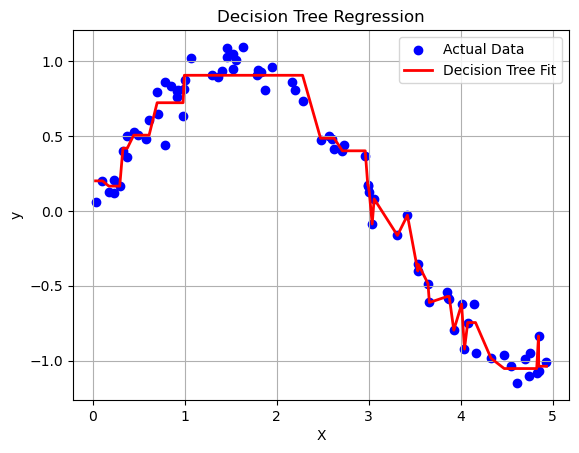

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_model.predict(X_test)

# Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualize the results
X_sorted = np.sort(X.flatten())
X_sorted = X_sorted.reshape(-1, 1)

# Predict for the entire sorted range to see the full curve
y_pred_curve = tree_model.predict(X_sorted)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='Decision Tree Fit')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## K-Nearest Neighbors (KNN) Regression
## Finally, let's use a non-parametric model: KNN Regression.
1. **Train the Model:** Create a KNeighborsRegressor instance. Start with n_neighbors=3. Train the model using X_train and y_train.
2. **Make Predictions:** Use the trained model to predict values for X_test.
3. **Evaluate Performance:** Calculate the MSE and R2 for the KNN model's predictions


Model Evaluation:
Mean Squared Error (MSE): 0.01
R² Score: 0.98


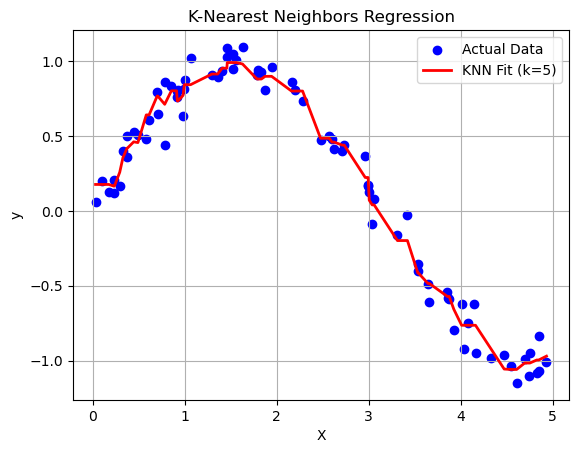

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Train the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize the results
# Sort for a smooth curve
X_sorted = np.sort(X.flatten())
X_sorted = X_sorted.reshape(-1, 1)

# Predict across the full sorted range
y_pred_curve = knn_model.predict(X_sorted)

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='KNN Fit (k=5)')
plt.title('K-Nearest Neighbors Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The Linear Regression model shows moderate to low predictive power with an R² of 0.45 and a relatively high MSE of 0.25. This suggests that the model is not a good fit for the data, only capturing the general downward direction. The Decision Tree model achieves a very low MSE of 0.01 and a high R² of 0.97, indicating excellent fit on the training data. However, its sensitivity to individual data point fluctuations as shown by its spikiness suggests potential overfitting. This instability may reduce its ability to generalize unseen data. The K-Nearest Neighbors (KNN) model also performs strongly, with an MSE of 0.01 and an R² of 0.98. Its slightly better R² than the decision tree, combined with typically smoother behavior across data points, implies it may generalize better, though its performance can vary depending on the choice of n-neighbors and data density.